<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 5 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Optimisez la gestion des données d'une boutique avec R ou Python
</h2>


# Objectifs de la mission
La mission se passe en 3 points :
<ul>
    <li>Rapprocher l'export de l'ERP et l'export des données du site web grâce au fichier liaison ;</li>
    <li>Analyser le chiffre d'affaire par produit et le chiffre d'affaires total en ligne ;</li>
    <li>Repérer et analyser les outliers atypiques de la variable prix.</li>
    </ul>
Le principal enjeu de cette mission est le nettoyage des bases de données qui a besoin d'un pré-traitement.

# Table des matières
* [Etape 1 - Importation des librairies et chargement des fichiers](#etape1)
    * [1.1. Importation des librairies](#section1_1)
    * [1.2. Chargement des fichiers Excel](#section1_2)
* [Etape 2 - Analyse et nettoyage des fichiers](#etape2)
    * [2.1. - Analyse et nettoyage du fichier erp](#section2_1)
        * [2.1.1. Erreurs de type](#section2_1_1)
        * [2.1.2. Valeurs manquantes](#section2_1_2)
        * [2.1.3. Doublons](#section2_1_3)
        * [2.1.4. Détection d'outliers](#section2_1_4)
    * [2.2 - Analyse et nettoyage du fichier web](#section2_2)
        * [2.2.1. Erreurs de type](#section2_2_1)
        * [2.2.2. Valeurs manquantes](#section2_2_2)
        * [2.2.3. Doublons](#section2_2_3)
        * [2.2.4. Détection d'outliers](#section2_2_4)
    * [2.3 - Analyse et nettoyage du fichier liaison](#section2_3)
        * [2.3.1. Erreurs de type](#section2_3_1)
        * [2.3.2. Valeurs manquantes](#section2_3_2)
        * [2.3.3. Doublons](#section2_3_3)
        * [2.3.4. Détection d'outliers](#section2_3_4)
* [Etape 3 - Analyse des données](#etape3)
    * [3.1 - Jointure des tables](#section3_1)
    * [3.2 - Analyse des outliers](#section3_2)
        * [3.2.1. Recherche d'outliers](#section3_2_1)
        * [3.2.2. Analyse des outliers](#3_2_2)
* [Etape 4 - Analyse de la colonne prix](#etape4)
* [Etape 5 - Analyse du chiffre d'affaires](#etape5)
    * [5.1 - Chiffre d'affaires par produit](#section5_1)
    * [5.2 - Chiffre d'affaires réalisé en ligne](#section5_2)
    

<div style="background-color: RGB(0,150,250);" >
<a class="anchor" id="etape1"><h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2></a>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section1_1"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3></a>
</div>

In [1]:
#Importation de la librairie pandas
import pandas as pd
#Importation de la librairie numpy
import numpy as np
#Importation de la librairie Matplotlib
import matplotlib.pyplot as plt
#Importation de la librairie seaborn
import seaborn as sns
#Importation de la librairie datetime (pour les dates)
import datetime as dt
#Importation de la librairie stats
import scipy.stats as st

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section1_2"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3></a>
</div>

In [2]:
#Importation du fichier Fichier_erp.csv
erp = pd.read_csv('Fichier_erp.csv', sep=';')

#Importation du fichier fichier_liaison.csv
liaison = pd.read_csv('fichier_liaison.csv', sep=';')

#Importation du fichier Fichier_web.csv
web = pd.read_csv('Fichier_web.csv', sep=';')

<div style="background-color: RGB(0,150,250);" >
<a class="anchor" id="etape2"><h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse et nettoyage des fichiers</h2></a>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section2_1"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse et nettoyage du fichier erp</h3></a>
</div>

In [3]:
#Visualisation des premières lignes du fichier erp
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,"24,2",0,outofstock
1,3849,1,"34,3",0,outofstock
2,3850,1,"20,8",0,outofstock
3,4032,1,"14,1",0,outofstock
4,4039,1,46,0,outofstock


In [4]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} articles".format(erp.shape[0]))
print("Le tableau comporte {} colonnes".format(erp.shape[1]))

Le tableau comporte 825 articles
Le tableau comporte 5 colonnes


<a class="anchor" id="section2_1_1"><h3 style="color: RGB(0,150,250); ">2.1.1. Erreurs de type</h3></a>

In [5]:
#La nature des données dans chacune des colonnes
print('La nature des données dans chaque colonnes :\n',erp.dtypes)

La nature des données dans chaque colonnes :
 product_id         int64
onsale_web         int64
price             object
stock_quantity     int64
stock_status      object
dtype: object


<h4 style="color: RGB(0,150,250); ">Observation</h4>
<ul>
    <li>Le type de la colonne price est un object et non un float</li>
    </ul>

In [6]:
#Détection des types d'erreurs
erp[pd.to_numeric(erp['price'], errors='coerce').isna()]['price']

0      24,2
1      34,3
2      20,8
3      14,1
5      34,3
       ... 
787     8,4
792    27,5
822    54,8
823    26,5
824    16,3
Name: price, Length: 609, dtype: object

In [7]:
#Remplacement des caractères problématiques
erp['price']=erp['price'].str.replace(',', '.', regex=True)

In [8]:
#Conversion de la colonne price en float
erp['price']=erp['price'].astype(float)

<a class="anchor" id="section2_1_2"><h3 style="color: RGB(0,150,250); ">2.1.2. Valeurs manquantes</h3></a>

In [9]:
#Afficher uniquement les variables qui ont des valeurs manquantes et leur somme
nb_na = erp.isnull().sum()
nb_na[nb_na>0]

Series([], dtype: int64)

<h4 style="color: RGB(0,150,250); ">Observation</h4>
<ul>
    <li>Aucune valeur manquante</li>
    </ul>

<a class="anchor" id="section2_1_3"><h3 style="color: RGB(0,150,250); ">2.1.3. Doublons</h3></a>

In [10]:
#Recherche de doublons sur la clé roduct_id
erp.loc[erp[['product_id']].duplicated(keep=False),:]

,product_id,onsale_web,price,stock_quantity,stock_status


<h4 style="color: RGB(0,150,250); ">Observation</h4>
<ul>
    <li>Aucun doublon</li>
    </ul>

<a class="anchor" id="section2_1_4"><h3 style="color: RGB(0,150,250); ">2.1.4. Détection d'outliers</h3>

In [11]:
#Description des variables quantitatives
erp.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.384000,26.583030
std,902.644635,0.337506,26.832271,45.875948
min,3847.000000,0.000000,-8.000000,-1.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


<h4 style="color: RGB(0,150,250); ">Observations</h4>
<ul>
    <li>Il y a des prix négatifs (ce doit être des bons de réduction)</li>
    <li>Il y a des quantités de stock négatives (inutile de le changer pour l'analyse)</li>
    </ul>

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section2_2"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse et nettoyage du fichier web</h3>
</div>

In [12]:
#Visualisation des premières lignes du fichier web
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [13]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} articles".format(web.shape[0]))
print("Le tableau comporte {} colonnes".format(web.shape[1]))

Le tableau comporte 1513 articles
Le tableau comporte 28 colonnes


<a class="anchor" id="section2_2_1"><h3 style="color: RGB(0,150,250); ">2.2.1. Erreurs de type</h3>

In [14]:
#La nature des données dans chacune des colonnes
print('La nature des données dans chaque colonnes :\n',web.dtypes)

La nature des données dans chaque colonnes :
 sku                       object
virtual                    int64
downloadable               int64
rating_count               int64
average_rating           float64
total_sales              float64
tax_status                object
tax_class                float64
post_author              float64
post_date                 object
post_date_gmt             object
post_content             float64
post_title                object
post_excerpt              object
post_status               object
comment_status            object
ping_status               object
post_password            float64
post_name                 object
post_modified             object
post_modified_gmt         object
post_content_filtered    float64
post_parent              float64
guid                      object
menu_order               float64
post_type                 object
post_mime_type            object
comment_count            float64
dtype: object


<h4 style="color: RGB(0,150,250); ">Observations</h4>
<ul>
    <li>Le type de la colonne post_date est un object et non un datetime</li>
    <li>Le type de la colonne post_date_gmt est un object et non un datetime</li>
    <li>Le type de la colonne post_modified est un object et non un datetime</li>
    <li>Le type de la colonne post_modified_gmt est un object et non un datetime</li>
    </ul>

In [15]:
#Correction du problème de type pour les dates
web['post_date'] = pd.to_datetime(web['post_date'])
web['post_date_gmt'] = pd.to_datetime(web['post_date_gmt'])
web['post_modified'] = pd.to_datetime(web['post_date'])
web['post_modified_gmt'] = pd.to_datetime(web['post_date'])

<a class="anchor" id="section2_2_2"><h3 style="color: RGB(0,150,250); ">2.2.2. Valeurs manquantes</h3>

In [16]:
#Afficher uniquement les variables qui ont des valeurs manquantes et le nombre de valeurs manquantes
nb_na = web.isnull().sum()
nb_na[nb_na>0]

sku                        85
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

<h4 style="color: RGB(0,150,250); ">Observations</h4>
<ul>
    <li>tax_class, post_content, post_password et post_content_filtered sont des colonnes vides</li>
    <li>Il y a 83 valeurs manquantes pour beaucoup de colonnes</li>
    <li>Il y a 85 articles sans sku</li>
    <li>tax_status n'est pas précisé pour 798 transactions</li>
    <li>post_mime_type n'est pas précisé pour 799 transactions</li>
    </ul>

<li>Gestion des colonnes vides

In [17]:
#Si ces colonnes sont vides, je propose de les supprimer
web=web.drop(columns=['tax_class', 'post_content', 'post_password','post_content_filtered'])

<li>Gestion des 83 valeurs manquantes

In [18]:
#observation des valeurs nulles au travers de la variable 'average_rating'
web.loc[web['average_rating'].isnull(),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1421,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1448,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1450,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Récupération des index de ces lignes
i = web.loc[web['average_rating'].isnull(),:].index
#Suppression des lignes en question
web=web.drop(web.index[i])

<li>Gestion de tax_status

In [20]:
#Observation des valeurs non nulles au travers de 'average_rating'
web.loc[~web['tax_status'].isnull(),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
2,15075,0,0,0,0.0,3.0,taxable,2.0,2018-02-14 15:39:43,2018-02-14 14:39:43,...,closed,pares-balta-penedes-indigena-2017,2018-02-14 15:39:43,2018-02-14 15:39:43,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,2.0,2018-02-14 17:15:31,2018-02-14 16:15:31,...,closed,maurel-cabardes-tradition-2017,2018-02-14 17:15:31,2018-02-14 17:15:31,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
5,13895,0,0,0,0.0,0.0,taxable,2.0,2019-03-19 10:41:50,2019-03-19 09:41:50,...,closed,chateau-saransot-dupre-bordeaux-blanc-2016,2019-03-19 10:41:50,2019-03-19 10:41:50,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
6,12857,0,0,0,0.0,0.0,taxable,2.0,2018-04-12 17:56:13,2018-04-12 15:56:13,...,closed,chateau-de-puligny-montrachet-1cru-champ-canet...,2018-04-12 17:56:13,2018-04-12 17:56:13,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
9,14106,0,0,0,0.0,0.0,taxable,2.0,2019-06-08 09:54:21,2019-06-08 07:54:21,...,closed,stephane-tissot-chateau-chalon-2011,2019-06-08 09:54:21,2019-06-08 09:54:21,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,15941,0,0,0,0.0,4.0,taxable,2.0,2018-02-12 14:26:52,2018-02-12 13:26:52,...,closed,jerome-cotes-du-rhone-2018,2018-02-12 14:26:52,2018-02-12 14:26:52,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1503,10459,0,0,0,0.0,0.0,taxable,2.0,2018-04-13 15:58:19,2018-04-13 13:58:19,...,closed,alphonse-mellot-sancerre-rouge-generation-xix-...,2018-04-13 15:58:19,2018-04-13 15:58:19,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1507,16320,0,0,0,0.0,3.0,taxable,2.0,2018-02-12 12:49:29,2018-02-12 11:49:29,...,closed,mourgues-du-gres-costieres-de-nimes-terre-darg...,2018-02-12 12:49:29,2018-02-12 12:49:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1509,15663,0,0,0,0.0,3.0,taxable,2.0,2018-02-27 10:27:01,2018-02-27 09:27:01,...,closed,chermette-domaine-du-vissoux-brouilly-pierreux...,2018-02-27 10:27:01,2018-02-27 10:27:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [21]:
#Existe-t-il des valeurs non nulles différentes de 'taxable' ?
web.loc[~(web['tax_status']=='taxable')&(~web['tax_status'].isnull()),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


In [22]:
#Changement des NaN en 'untaxable'
web.loc[web['tax_status'].isnull(),'tax_status']='untaxable'

<li>Gestion de post_mime_type

In [23]:
#Existe-t-il des valeurs non nulles différentes de 'image/jpeg' ?
web.loc[(~web['post_mime_type'].isnull())&(web['post_mime_type']!='image/jpeg'),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


In [24]:
#Existe-t-il un lien entre post_type et post_mime_type ?
web.loc[~(web['post_type']=='attachment')&((web['post_mime_type']=='image/jpeg')),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


In [25]:
#Valeurs prises par post_type
web['post_type'].value_counts()

product       716
attachment    714
Name: post_type, dtype: int64

In [26]:
#La colonne 'post_mime_type' est donc rendondante avec 'post_type'
#Suppression de la colonne
web=web.drop(columns=['post_mime_type'])

<li>Gestion des sku manquants</li>

In [27]:
web.loc[web['sku'].isnull(),['sku','total_sales','post_name']]

,sku,total_sales,post_name
353,NaN,3.0,pierre-jean-villa-condrieu-suspendu-2018
488,NaN,10.0,pierre-jean-villa-cote-rotie-fongeant-2017


In [28]:
#Suppression des lignes en ne gardant que les sku non nuls
web=web.loc[~web['sku'].isnull(),:]

<a class="anchor" id="section2_2_3"><h3 style="color: RGB(0,150,250); ">2.2.3. Doublons</h3>

In [29]:
#Recherche de doublons au travers de la variable post_date
web.loc[web['post_date'].duplicated(keep=False),:].sort_values('post_date')

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
816,15298,0,0,0,0.0,6.0,untaxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2018-02-08 12:58:52,2018-02-08 12:58:52,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,0.0
522,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2018-02-08 12:58:52,2018-02-08 12:58:52,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
1375,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2018-02-08 13:49:41,2018-02-08 13:49:41,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
67,15296,0,0,0,0.0,0.0,untaxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2018-02-08 13:49:41,2018-02-08 13:49:41,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,0.0
833,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2018-02-08 14:08:36,2018-02-08 14:08:36,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,15887,0,0,0,0.0,0.0,taxable,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,...,closed,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-05-02 15:00:54,2020-05-02 15:00:54,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
503,13127-1,0,0,0,0.0,0.0,taxable,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,...,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-06-09 15:42:04,2020-06-09 15:42:04,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
490,13127-1,0,0,0,0.0,0.0,untaxable,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,...,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-06-09 15:42:04,2020-06-09 15:42:04,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,0.0
910,16230,0,0,0,0.0,0.0,untaxable,2.0,2020-07-20 11:00:00,2020-07-20 09:00:00,...,closed,closed,domaine-saint-nicolas-fiefs-vendeens-blanc-les...,2020-07-20 11:00:00,2020-07-20 11:00:00,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,0.0


<h4 style="color: RGB(0,150,250); ">Observation</h4>
<ul>
    <li>Toutes les lignes sont en doubles ; les doublons sont différenciés par la colonne post_type avec le caractère soit 'product' soit 'attachment'</li>
    </ul>

In [30]:
#suppression des post_type=attachment en gardant les 'product'
web=web.loc[web['post_type']=='product',:]
#suppression de la colonne 'product' qui n'est plus essentielle pour l'analyse
web=web.drop(columns='post_type')

<a class="anchor" id="section2_2_4"><h3 style="color: RGB(0,150,250); ">2.2.4. Détection d'outliers</h3>

In [31]:
#Description des variables quantitatives du dataset
web.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,post_author,post_parent,menu_order,comment_count
count,714.0,714.0,714.0,714.0,714.000000,714.000000,714.0,714.0,714.0
mean,0.0,0.0,0.0,0.0,4.012605,1.998599,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.518183,0.037424,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,2.000000,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,2.000000,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,2.000000,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,2.000000,0.0,0.0,0.0


<h4 style="color: RGB(0,150,250); ">Observations</h4>
<ul>
    <li>Il n'y a que des 0 dans virtual, downloadable, rating_count, average_rating, post_parent, menu_order et comment_count.</li>
    </ul>

In [32]:
#Suppression des colonnes en question
web=web.drop(columns=['virtual','downloadable','rating_count','average_rating','post_parent','menu_order','comment_count'])

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section2_3"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse et nettoyage du fichier liaison</h3>
</div>

In [33]:
#Visualisation des premières lignes du fichier web
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [34]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} références".format(liaison.shape[0]))
print("Le tableau comporte {} colonnes".format(liaison.shape[1]))

Le tableau comporte 825 références
Le tableau comporte 2 colonnes


In [35]:
#Renommage de la colonne id_web en sku
liaison=liaison.rename(columns={'id_web':'sku'})

<a class="anchor" id="section2_3_1"><h3 style="color: RGB(0,150,250); ">2.3.1. Erreurs de type</h3>

In [36]:
#Visualisation des types de chacune des colonnes
liaison.dtypes

product_id     int64
sku           object
dtype: object

<h4 style="color: RGB(0,150,250); ">Observations</h4>
<ul>
    <li>Aucun problème de type</li>
    </ul>

<a class="anchor" id="section2_3_2"><h3 style="color: RGB(0,150,250); ">2.3.2. Valeurs manquantes</h3>

In [37]:
#Afficher uniquement les variables qui ont des valeurs manquantes
nb_na = liaison.isnull().sum()
nb_na[nb_na>0]

sku    91
dtype: int64

<h4 style="color: RGB(0,150,250); ">Observations</h4>
<ul>
    <li>91 valeurs nulles pour la colonne sku</li>
    </ul>

In [38]:
#Suppression des NaN dans la colonne sku
liaison=liaison.loc[~liaison['sku'].isnull(),:]

<a class="anchor" id="section2_3_3"><h3 style="color: RGB(0,150,250); ">2.3.3. Doublons</h3>

In [39]:
#Détection de doublons
liaison.loc[liaison[['sku','product_id']].duplicated(keep=False),:]

,product_id,sku


<h4 style="color: RGB(0,150,250); ">Observation</h4>
<ul>
    <li>Aucun doublon</li>
    </ul>

<a class="anchor" id="section2_3_4"><h3 style="color: RGB(0,150,250); ">2.3.4. Détection d'outliers</h3>

In [40]:
#Description de la colonne product_id
liaison.describe()

,product_id
count,734.000000
mean,5041.859673
std,790.309295
min,3847.000000
25%,4287.250000
50%,4862.500000
75%,5714.250000
max,7338.000000


<h4 style="color: RGB(0,150,250); ">Observation</h4>
<ul>
    <li>Pas d'outliers</li>
    </ul>

<div style="background-color: RGB(0,150,250);" >
<a class="anchor" id="etape3"><h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Analyse des données</h2></a>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
    <a class="anchor" id="section3_1"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Jointure des tables</h3>
</div>

In [41]:
#Jointure des tables en deux temps
data=pd.merge(web,liaison,on='sku',how='right')
data=pd.merge(data,erp,on='product_id',how='left')

In [42]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} articles".format(data.shape[0]))
print("Le tableau comporte {} colonnes".format(data.shape[1]))

Le tableau comporte 734 articles
Le tableau comporte 20 colonnes


In [43]:
#Affichage des premières lignes du dataframe
data.head()

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,product_id,onsale_web,price,stock_quantity,stock_status
0,15298,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2018-02-08 12:58:52,2018-02-08 12:58:52,https://www.bottle-neck.fr/?post_type=product&...,3847,1,24.2,0,outofstock
1,15296,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2018-02-08 13:49:41,2018-02-08 13:49:41,https://www.bottle-neck.fr/?post_type=product&...,3849,1,34.3,0,outofstock
2,15300,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2018-02-08 14:08:36,2018-02-08 14:08:36,https://www.bottle-neck.fr/?post_type=product&...,3850,1,20.8,0,outofstock
3,19814,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2018-02-09 14:01:05,2018-02-09 14:01:05,https://www.bottle-neck.fr/?post_type=product&...,4032,1,14.1,0,outofstock
4,19815,0.0,taxable,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2018-02-12 09:04:37,2018-02-12 09:04:37,https://www.bottle-neck.fr/?post_type=product&...,4039,1,46.0,0,outofstock


In [44]:
#Vérification de la jointure par racherche de doublons dans la clé product_id
data.loc[data['product_id'].duplicated(keep=False),:]

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,product_id,onsale_web,price,stock_quantity,stock_status


<div style="border: 1px solid RGB(0,150,250);" >
    <a class="anchor" id="section3_2"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Analyse des outliers</h3>
</div>

<a class="anchor" id="section3_2_1"><h3 style="color: RGB(0,150,250); ">3.2.1. Recherche d'outliers</h3>

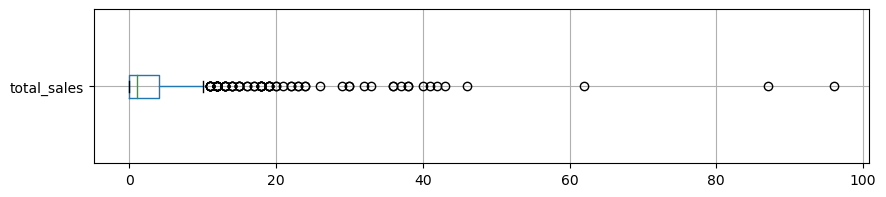

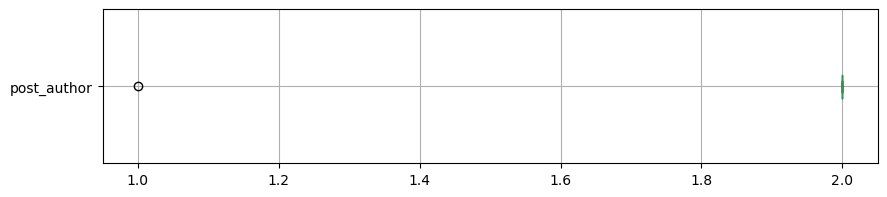

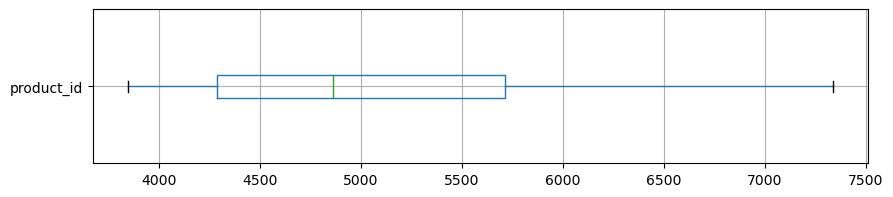

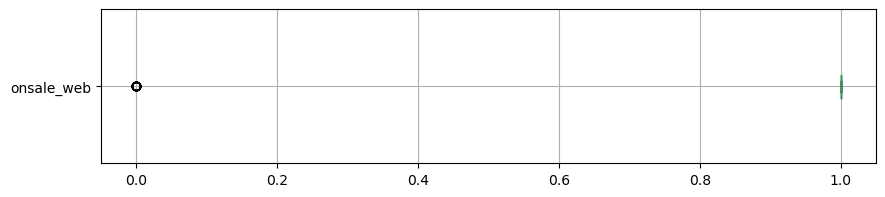

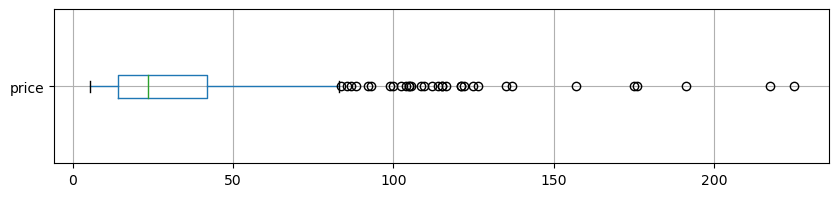

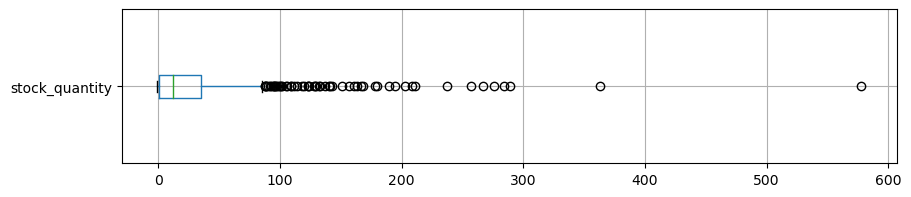

In [45]:
#Recherche des outliers quantitatifs avec la méthode des écarts interquartiles

for colonne in data.columns:
    if((data[colonne].dtypes=='float64')or(data[colonne].dtypes=='int64')):
        #Taille fenêtre
        plt.figure(figsize=(10, 2))
        data.boxplot(column=colonne, vert=False)
        plt.show()

<h4 style="color: RGB(0,150,250); ">Observations</h4>
<ul>
    <li>On constate des valurs atypiques élevées sur: </li>
    <ul>
        <li>total_sales, stock_quantity</li>
    </ul>
    <li>Les valeurs atypiques de la colonne sku sont normales car les identifiants ont été donnés arbitrairement</li>
    <li>Il y a une valeur atypique dans onsale_web</li>
    <li>L'étude de la colonne price sera l'objet de la partie 4</li>
</ul>

<a class="anchor" id="section3_2_2"><h3 style="color: RGB(0,150,250); ">3.2.2. Analyse des outliers</h3>

<h4 style="color: RGB(0,150,250); ">Analyse de total_sales, stock_quantity et onsale_web</h4>

In [46]:
data.loc[data['onsale_web']==0]

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,product_id,onsale_web,price,stock_quantity,stock_status
185,13771,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,4289,0,22.8,0,outofstock
227,15065,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,4568,0,21.5,0,outofstock
230,14785,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,4584,0,32.3,0,outofstock
334,12601,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,4741,0,12.4,0,outofstock
368,15154,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,4864,0,8.3,0,outofstock
371,14360,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,4869,0,17.2,0,outofstock
399,15608,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,4921,0,13.8,0,outofstock
400,15586,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,4922,0,21.5,0,outofstock
443,15272,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,5018,0,15.4,0,outofstock
445,15630,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,5021,0,17.1,0,outofstock


L'apparition de toutes ces valeurs manquantes s'explique par le fait que certaines références ne sont pas en vente en ligne, elles n'apparaissent donc pas dans le fichier web. <br/>
La valeur 0 pour onsale_web marque le fait que le produit n'est pas en vente en ligne.

Pour  total_sales et stock_quantity, il n'y a pas de valeur abérante.<br/>
<ul>
<li>En ce qui concerne la colonne stock_quantity, l'approvisionnment des stocks dépend de l'offre que souhaite proposer le gestionnaire ;</li>
    <li>Pour la colonne total_sales, le nombre de bouteilles vendues est aléatoire.</li>
    </ul>

<div style="background-color: RGB(0,150,250);" >
<a class="anchor" id="etape4"><h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse de la colonne prix</h2>
</div>

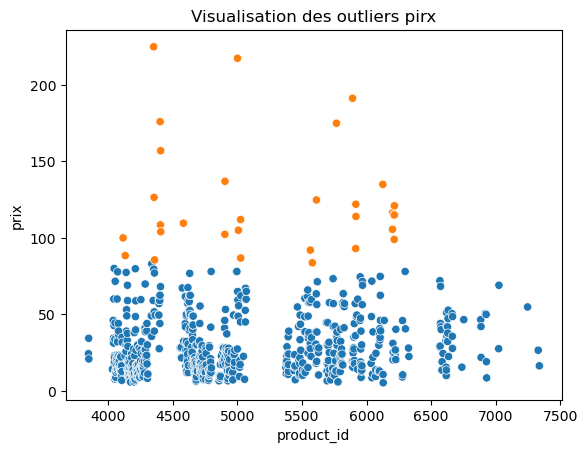

Nombre d'outliers : 33


In [47]:
#Création des variables Q1 et Q3 : les quartiles
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
#Ecart interquartiles
eiq = Q3 - Q1

#On affiche une visualisation des outliers
#hue sert à colorer certains points
sns.scatterplot(x=data['product_id'],y=data['price'],hue = (data.price > (Q3 + 1.5 * eiq)),legend=False)

plt.xlabel('product_id')
plt.ylabel('prix')
plt.title('Visualisation des outliers pirx')
plt.show() 
#Affichage du nombre d'outliers
print('Nombre d\'outliers :',data.loc[data['price']> (Q3 + 1.5 * eiq)]['product_id'].count())

In [48]:
#Affichage des valeurs atypiques de price
#Affichage de la totalité des cellules post_title pour faciliter la recherche sur internet

#Création d'un dataset contenant uniquement les valeurs atypiques
data2=data.loc[data['price']> (Q3 + 1.5 * eiq),['post_title','price']]
data2=data2.sort_values('price',ascending=False)

#Affichage des produits
for i in range(data2.shape[0]):
    print(i+1,'-',data2.iloc[i,0],'à',data2.iloc[i,1],'euros')

1 - Champagne Egly-Ouriet Grand Cru Millésimé 2008 à 225.0 euros
2 - David Duband Charmes-Chambertin Grand Cru 2014 à 217.5 euros
3 - Coteaux Champenois Egly-Ouriet Ambonnay Rouge 2016 à 191.3 euros
4 - Cognac Frapin VIP XO à 176.0 euros
5 - Camille Giroud Clos de Vougeot 2016 à 175.0 euros
6 - Cognac Frapin Château de Fontpinot 1989 20 Ans d'Age à 157.0 euros
7 - Domaine Des Croix Corton Charlemagne Grand Cru 2016 à 137.0 euros
8 - Champagne Gosset Célébris Vintage 2007 à 135.0 euros
9 - Champagne Egly-Ouriet Grand Cru Blanc de Noirs à 126.5 euros
10 - Domaine Weinbach Gewurztraminer Grand Cru Furstentum SGN 2010 1/2 à 124.8 euros
11 - Wemyss Malts Single Cask Scotch Whisky Choc 'n' Nut Pretzel 2001 Bunnahabhain à 122.0 euros
12 - Domaine des Comtes Lafon Volnay 1er Cru Santenots du Milieu 2016 à 121.0 euros
13 - Domaine des Comtes Lafon Volnay 1er Cru Champans 2016 à 121.0 euros
14 - Domaine Clerget Echezeaux Grand Cru En Orveaux 2015 à 116.4 euros
15 - Domaine des Comtes Lafon Volna

Après quelques recherches sur internet, les prix de la base de données semblent cohérents avec la réalité du marché. L'entreprise vend peu de références à prix élevé, c'est pourquoi ces prix sont considérés comme des valeurs atypiques.

Sources :<br/>
https://www.enviedechamp.com/<br/>
https://www.vivino.com/

<div style="background-color: RGB(0,150,250);" >
<a class="anchor" id="etape5"><h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse du chiffre d'affaires</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
    <a class="anchor" id="section5_1"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">5.1 - Chiffre d'affaires par produit</h3>
</div>

In [49]:
#Isolation des colonnes nécéssaires au calcul du chiffre d'affaires par produit
CA=data.loc[:,['product_id','post_title','price','total_sales','onsale_web']]

In [50]:
#Calcul du chiffre d'affaires
CA['chiffre_affaires']=CA['price']*CA['total_sales']
#Affichage des premières lignes du dataset
CA.head()

,product_id,post_title,price,total_sales,onsale_web,chiffre_affaires
0,3847,Pierre Jean Villa Saint-Joseph Préface 2018,24.2,6.0,1,145.2
1,3849,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,34.3,0.0,1,0.0
2,3850,Pierre Jean Villa Crozes-Hermitage Accroche Co...,20.8,0.0,1,0.0
3,4032,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,14.1,3.0,1,42.3
4,4039,Pierre Jean Villa Côte Rôtie Carmina 2017,46.0,0.0,1,0.0


In [51]:
#Tri par ordre de chiffre d'affaires
CA=CA.sort_values('chiffre_affaires',ascending=False)
#Extraction des 10 meilleurs produits
top_CA=CA.head(10)

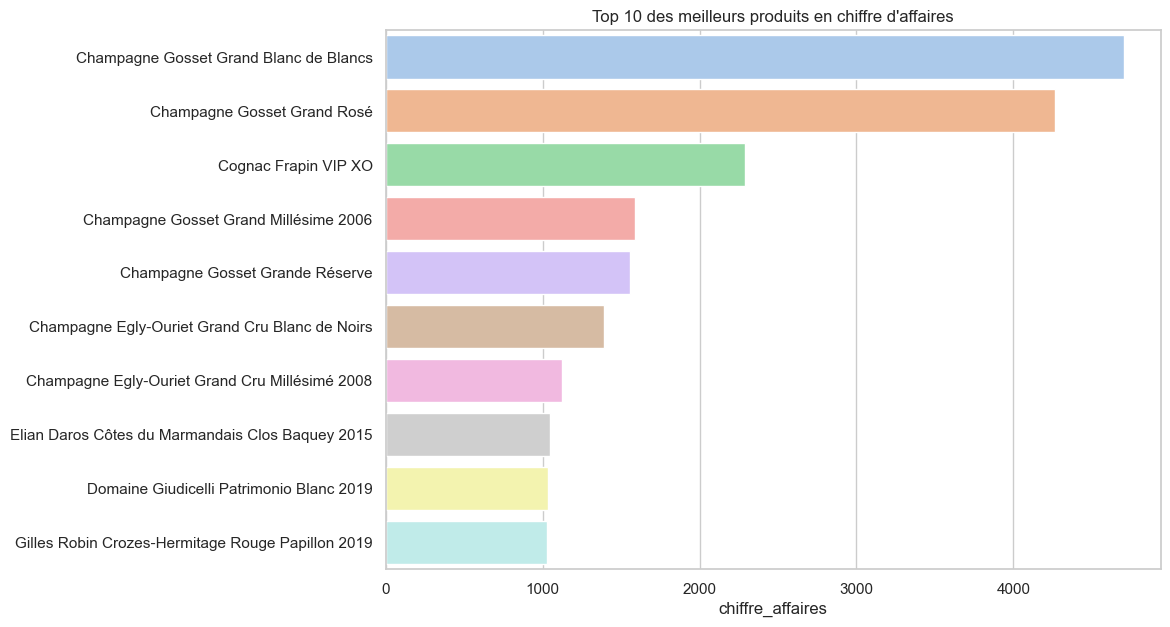

In [52]:
#Représentation graphique du top 10
#Taille fenêtre
plt.figure(figsize=(10, 7))

#Palette de couleurs
sns.set_theme(style='whitegrid', palette='pastel')

sns.barplot(data=top_CA,y='post_title',x='chiffre_affaires')
plt.ylabel(None)
plt.title('Top 10 des meilleurs produits en chiffre d\'affaires')

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
    <a class="anchor" id="section5_2"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">5.2 - Chiffre d'affaires réalisé en ligne</h3>
</div>

In [53]:
#Calcul du chiffre d'affaires total
CA_total=CA.loc[CA['onsale_web']==1,['chiffre_affaires']].sum()
print('Chiffre d\'affaires total réalisé en ligne : ',CA_total[0],'€')

Chiffre d'affaires total réalisé en ligne :  70568.6 €


À noter que le filtre par ('onsale_web'==1) n'est pas essentiel car le jeu de donnée ne permet d'analyser que les ventes en lignes car aucune donnée sur les ventes en boutique n'a été fournie. Néanmoins, comme la gestion de la base de donnée est vouée à changer, ce filtre risque d'être utile à l'avenir.